In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
df=pd.read_csv('Temp_Raw.csv')
df.Timestamp=pd.to_datetime(df.Timestamp,format='%d/%m/%Y %H:%M')
df.columns=['Timestamp', 'FAHU_A1', 'FAHU_A2',
       'FAHU_B1', 'FAHU_B2','FAHU', 'FAHU1','FAHU2']
# df.head(7).sum()

In [3]:
gf=df.groupby(pd.Grouper(key='Timestamp',freq='15min')).mean()
gf.head()
gf.columns


Index(['FAHU_A1', 'FAHU_A2', 'FAHU_B1', 'FAHU_B2', 'FAHU', 'FAHU1', 'FAHU2'], dtype='object')

In [4]:
gf.describe().T
# gf.query('FAHU2>50')




,count,mean,std,min,25%,50%,75%,max
FAHU_A1,34716.0,30.157673,7.066412,15.28,24.71,30.76,35.61,48.14
FAHU_A2,34718.0,30.281793,6.558284,14.59,24.96,30.54,35.31,47.25
FAHU_B1,34718.0,23.927147,1.916953,18.80,22.20,24.00,25.10,34.00
FAHU_B2,34715.0,25.907028,2.287763,19.48,24.49,26.38,27.40,34.12
FAHU,34716.0,29.115108,6.120853,13.65,23.99,29.64,34.28,43.52
FAHU1,34717.0,30.288147,6.689458,13.40,24.60,30.50,35.30,49.40
FAHU2,34720.0,29.245017,5.113993,15.90,25.90,28.90,33.50,88.50


Below cell checks the furthest column which should be removed

In [5]:
def furthest(ls): # finds the furthest element in a list
    s=ls.mean()
    d=abs(ls-s)
    return(np.argmax(d))

# furthest(ls) # list of elements

smol=gf.sample(frac=0.0003,random_state=42) # about 10 readings
smol=gf.sample(frac=1,random_state=42) # full list
smol['mean']=smol.apply(lambda x: x.mean(),axis=1)
columns=smol.columns
smol['Furthest Col']=smol.apply(lambda x: columns[furthest(x)],axis=1)
smol

,FAHU_A1,FAHU_A2,FAHU_B1,FAHU_B2,FAHU,FAHU1,FAHU2,mean,Furthest Col
Timestamp,,,,,,,,,
2022-07-28 00:15:00,28.98,29.00,28.8,28.26,29.15,29.4,27.5,28.727143,FAHU2
2022-04-19 14:45:00,31.77,29.53,24.2,26.81,28.09,30.5,28.7,28.514286,FAHU_B1
2022-08-08 22:45:00,39.03,39.17,25.2,28.51,39.77,38.3,35.6,35.082857,FAHU_B1
2022-08-27 06:45:00,34.09,34.12,26.0,27.77,32.25,36.3,32.5,31.861429,FAHU_B1
2022-11-13 07:30:00,25.49,25.52,24.0,25.76,23.75,25.6,24.8,24.988571,FAHU
...,...,...,...,...,...,...,...,...,...
2022-06-25 12:30:00,42.20,40.38,26.0,27.28,37.57,41.2,38.0,36.090000,FAHU_B1
2022-03-07 06:15:00,20.88,20.90,21.6,23.71,20.12,20.4,20.9,21.215714,FAHU_B2
2022-04-28 13:00:00,39.95,38.70,24.4,29.02,35.66,39.7,36.9,34.904286,FAHU_B1


In [114]:

# print(smol['Furthest Col'].value_counts()) # FAHU_B1 has the furthest values
smol.head()

,FAHU_A1,FAHU_A2,FAHU_B1,FAHU_B2,FAHU,FAHU1,FAHU2
Timestamp,,,,,,,
2022-07-28 00:15:00,28.98,29.00,28.8,28.26,29.15,29.4,27.5
2022-04-19 14:45:00,31.77,29.53,24.2,26.81,28.09,30.5,28.7
2022-08-08 22:45:00,39.03,39.17,25.2,28.51,39.77,38.3,35.6
2022-08-27 06:45:00,34.09,34.12,26.0,27.77,32.25,36.3,32.5
2022-11-13 07:30:00,25.49,25.52,24.0,25.76,23.75,25.6,24.8


In [115]:
smol2=gf.copy()
smol2.loc[smol2.FAHU2>50,'FAHU2']=30 # almost the mean of the other columns

Temp=pd.DataFrame(smol2.drop(['FAHU_B1','FAHU_B2'],axis=1).mean(axis=1),columns=['Temp'])
smol2.drop('FAHU2',axis=1,inplace=True)
Temp

,Temp
Timestamp,
2022-01-01 00:00:00,21.614
2022-01-01 00:15:00,21.414
2022-01-01 00:30:00,21.414
2022-01-01 00:45:00,21.414
2022-01-01 01:00:00,21.414
...,...
2022-12-31 17:15:00,22.400
2022-12-31 17:30:00,22.400
2022-12-31 17:45:00,22.400


C:\Users\Moataz Imad\AppData\Local\Temp\ipykernel_6432\3659559563.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  smol2.iloc[:,1:3].plot(ax=ax,subplots=True,layout=[2,3],color='#2277b1')
C:\Users\Moataz Imad\AppData\Local\Temp\ipykernel_6432\3659559563.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


[Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0, 0, '1.0')]

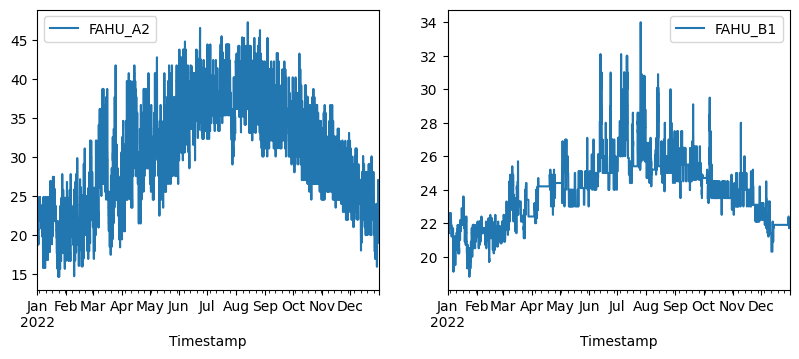

In [116]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=[15,8])
# smol2.plot(ax=ax,kind='line')
smol2.iloc[:,1:3].plot(ax=ax,subplots=True,layout=[2,3],color='#2277b1')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

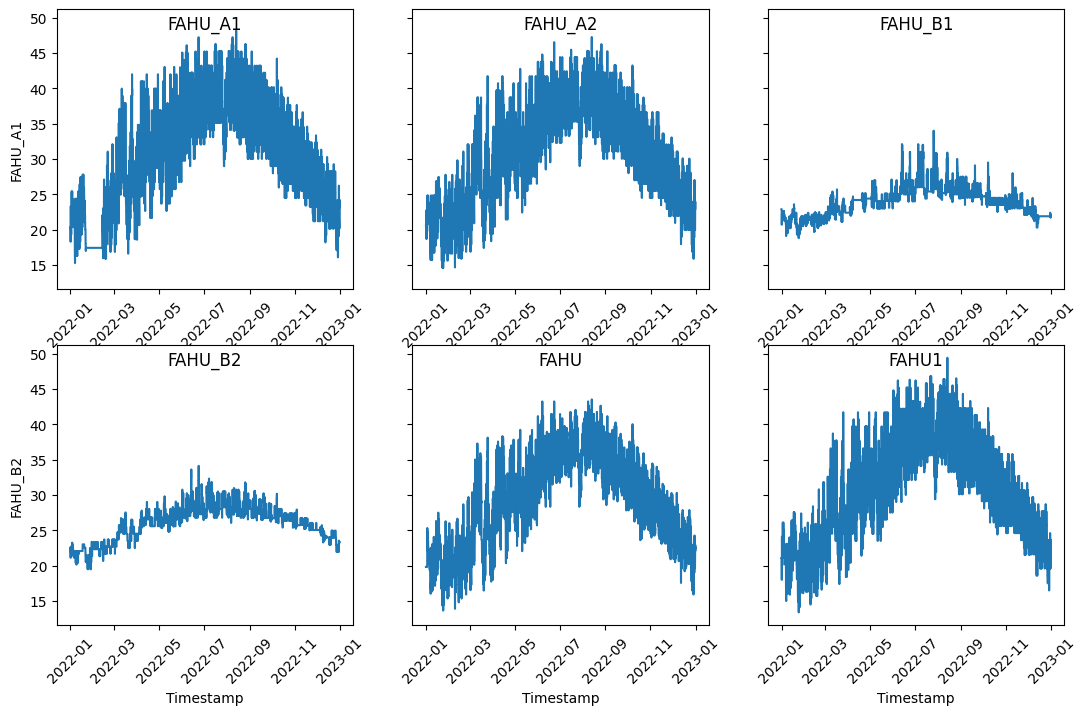

In [117]:
# Temp.plot.line()
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[13,8])

grid_h=2
cols=np.array(smol2.columns).reshape([grid_h,-1])
h,w=cols.shape
axs=fig.subplots(*cols.shape,sharey=True)
for i in range(h):
    for j in range(w):
        ax=axs[i,j]

        # plt.xticks(rotation=45)
        
        # sns.lineplot(smol2[cols[i,j]][0:300],ax=ax)
        # sns.lineplot(smol2[cols[i,j]]['2022-01-01':'2022-03-01'],ax=ax)
        sns.lineplot(smol2[cols[i,j]],ax=ax)
        ax.set_title(cols[i,j],y=0.9)
        
        plt.sca(ax)

        plt.xticks(rotation=45)
        # sns.scatterplot(x=ls,y=y,ax=ax)

# for i,j

FAHU_B2 and FAHU_B1 will be removed

<AxesSubplot: xlabel='Timestamp'>

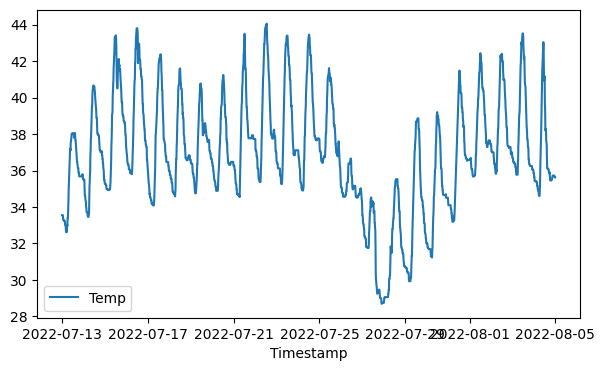

In [118]:
fig=plt.figure(figsize=[7,4])
# sns.lineplot(Temp[])
sns.lineplot(Temp['2022-07-13':'2022-08-04'])

<AxesSubplot: xlabel='Timestamp'>

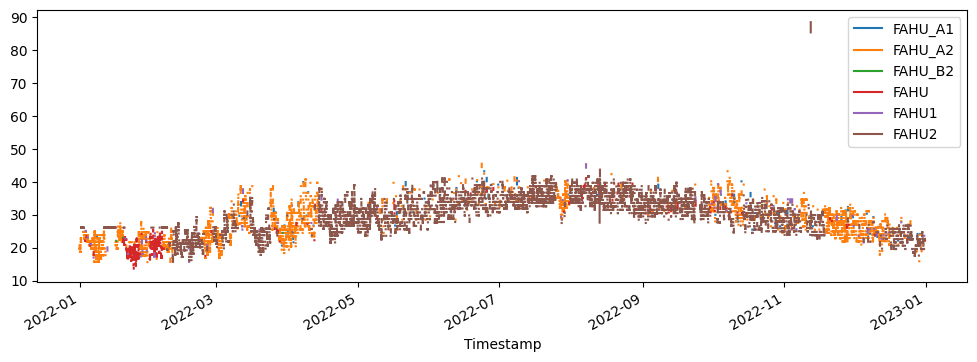

In [119]:
fig=plt.figure(figsize=[12,4])
ax=fig.subplots()
# sns.lineplot(df.set_index('Timestamp'))
tp=df.copy()
tp=df.set_index('Timestamp').drop('FAHU_B1',axis=1)
tp=tp['2022-01-01':]
tp.plot.line(ax=ax)

**Humidity**

In [120]:
df=pd.read_csv('Hum_Raw.csv')
df.Timestamp=pd.to_datetime(df.Timestamp,format='%d/%m/%Y %H:%M')
df.columns=['Timestamp', 'FAHU_A1', 'FAHU_B1',
       'FAHU_B2', 'FAHU_A2','FAHU', 'FAHU1', 'FAHU2']
gf=df.groupby(pd.Grouper(key='Timestamp',freq='15min')).mean()
gf.head()
# smol=gf.sample(frac=1,random_state=42)
# smol['mean']=smol.apply(lambda x: x.mean(),axis=1)
# columns=smol.columns
# smol['res']=smol.apply(lambda x: columns[furthest(x)],axis=1)
# smol

,FAHU_A1,FAHU_B1,FAHU_B2,FAHU_A2,FAHU,FAHU1,FAHU2
Timestamp,,,,,,,
2022-01-01 00:00:00,81.1,72.5,71.43,78.36,70.9,68.4,69.2
2022-01-01 00:15:00,81.1,72.5,71.43,78.36,73.4,68.4,69.2
2022-01-01 00:30:00,81.1,72.5,71.43,78.36,73.4,68.4,69.2
2022-01-01 00:45:00,81.1,72.5,71.43,78.36,73.4,68.4,69.2
2022-01-01 01:00:00,81.1,72.5,71.43,78.36,73.4,68.4,69.2


**Visualizing of how far each column from the average of the rest**

C:\Users\Moataz Imad\AppData\Local\Temp\ipykernel_6432\1243914488.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  diff.hist(ax=ax,sharex=True)


array([[<AxesSubplot: title={'center': 'FAHU_A1'}>,
        <AxesSubplot: title={'center': 'FAHU_B1'}>,
        <AxesSubplot: title={'center': 'FAHU_B2'}>],
       [<AxesSubplot: title={'center': 'FAHU_A2'}>,
        <AxesSubplot: title={'center': 'FAHU'}>,
        <AxesSubplot: title={'center': 'FAHU1'}>],
       [<AxesSubplot: title={'center': 'FAHU2'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

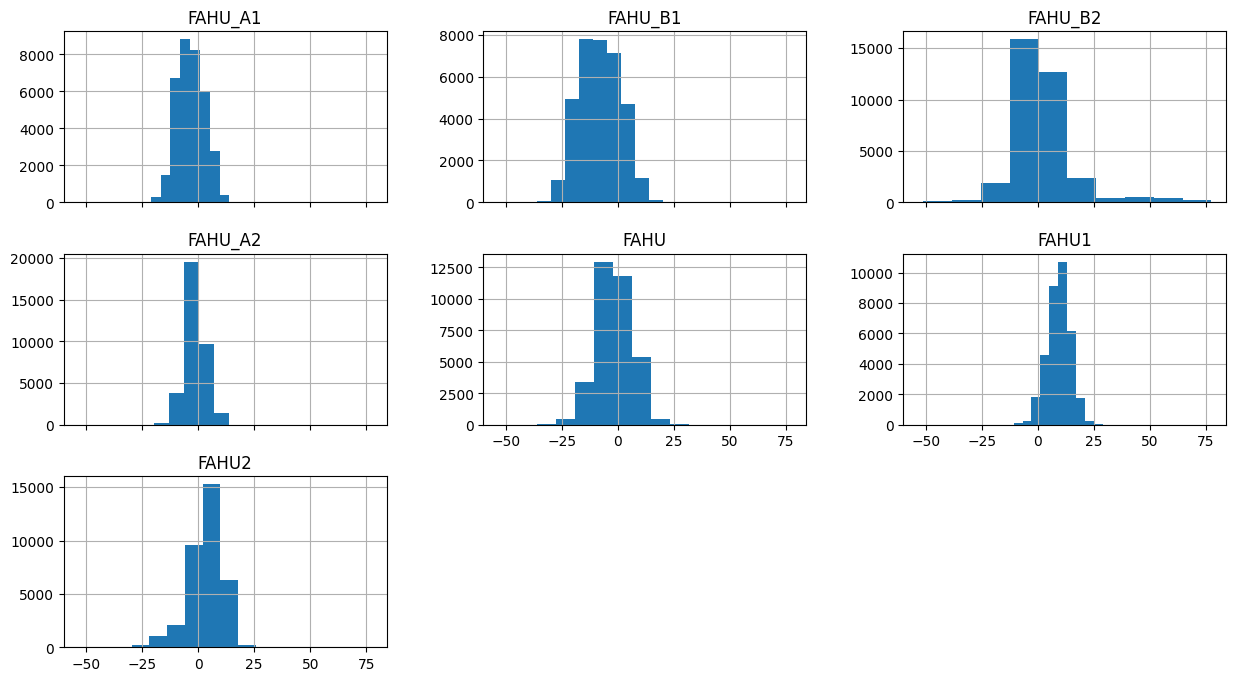

In [121]:

diff=pd.DataFrame()
cols=['FAHU_A1', 'FAHU_B1', 'FAHU_B2', 'FAHU_A2', 'FAHU', 'FAHU1', 'FAHU2']
for c in cols:
    cols2=cols.copy()
    cols2.remove(c)
    diff[c]=gf[cols2].mean(axis=1)-gf[c]
abs(diff).sum()
ax,fig=plt.subplots(figsize=[15,8],sharex=True)
diff.hist(ax=ax,sharex=True)
# diff.head()

we have to drop FAHU_B2

In [123]:
hum=pd.DataFrame(gf.drop(['FAHU_B2','FAHU_B1'],axis=1).mean(axis=1),columns=['Humidity'])

<AxesSubplot: xlabel='Timestamp', ylabel='Count'>

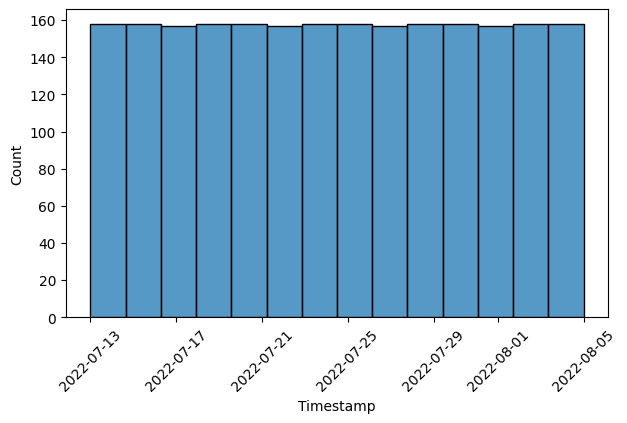

In [124]:
comb=pd.concat([Temp,hum],axis=1)
f=comb.copy()

ax,fig=plt.subplots(figsize=[7,4])
plt.xticks(rotation=45)
sns.histplot(x=f['2022-07-13':'2022-08-04'].index)
# f['2022-07-31 07:00:00':'2022-07-31 20:00:00'] # missing 7:15-12:30


In [125]:
# Fill missing values with custom values based on the index
time=pd.date_range('1/1/2022','1/1/2023',freq='15min')
time=time[time<'2023']
# new index that contains all the 35040 values (even the ones that are NA on both cols)

f2=f.reindex(time)

In [177]:
f2.index[10]
roww=f2['2022-01-01 02:30:00':'2022-01-01 02:30:00']
# nas or NAs takes the time series (ie. f2.Temp) iterate over it, if the value is na will store the filler
# t2 dictionary with the value of the series one day prior the resulting t2 dictionary will then be used to fill na
def nas(ts): 
    t2={}
    missing=ts[ts.isna()].index
    for i in missing:
        i1=i-timedelta(days=1)
        i2=i+timedelta(days=1)
        if i2 not in ts:
            i2=i1
        if i1 not in ts:
            i1=i2
                       
        i2= i1 if np.isnan(ts[i2]) else i2
        i1= i2 if np.isnan(ts[i1]) else i1
        s=(ts[i1]+ts[i2])/2

        t2[i]=s
    print(len(t2),end=' ')
    return t2

f3=f2.copy()
# for each iteration, all na values will be filled with previous day value, some values also have previous 
# day values be NA, so they will not be fixed, this is why we used a loop (one day deep will be fixed for each) 
for i in range(365): 
    f3.Temp=f3.Temp.fillna(nas(f3.Temp))
    f3.Humidity=f3.Humidity.fillna(nas(f3.Humidity))
    l2=f3.Humidity.isna().sum()
    l=f3.Temp.isna().sum()
    if l<24 and l2<24:
        print('\nLimit reached:',l,'\tNumber of iterations:',i+1)
        break

# f3.Temp.plot.line()
# f2.Humidity.plot.line()

289 312 
Limit reached: 0 	Number of iterations: 1


In [180]:
f3.to_csv('Dubai_TRH_2022_15mins.csv')
f2.to_csv('Dubai_TRH_2022_15mins wNA.csv')

In [195]:
f2['2022-05-01 01:00:00':'2022-05-3 01:00:00']

,Temp,Humidity
2022-05-01 01:00:00,27.048,63.180
2022-05-01 01:15:00,27.048,62.980
2022-05-01 01:30:00,26.848,62.980
2022-05-01 01:45:00,26.848,63.200
2022-05-01 02:00:00,26.848,63.404
...,...,...
2022-05-03 00:00:00,28.608,55.144
2022-05-03 00:15:00,28.608,56.162
2022-05-03 00:30:00,28.558,57.078
2022-05-03 00:45:00,28.558,58.302


In [162]:
np.nan == np.nan

False